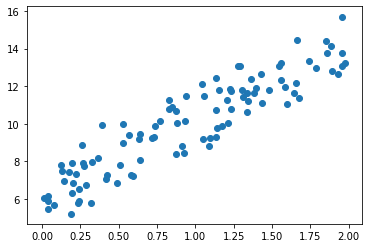

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred
    
    w0_factors=np.ones((N,1))
    
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

In [3]:
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1,w0

In [4]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost
w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{:.3f} w0:{:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
get_cost(y,y_pred)

w1:4.022 w0:6.162


0.9934784315632568

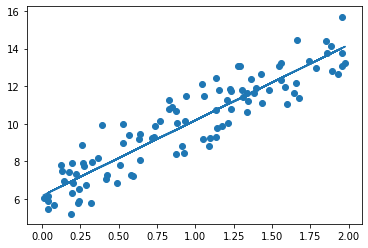

In [5]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [6]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    return w1,w0

In [7]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1',round(w1[0,0],3),'w0',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
get_cost(y,y_pred)

w1 4.028 w0 6.156


0.9937111256675345

In [8]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

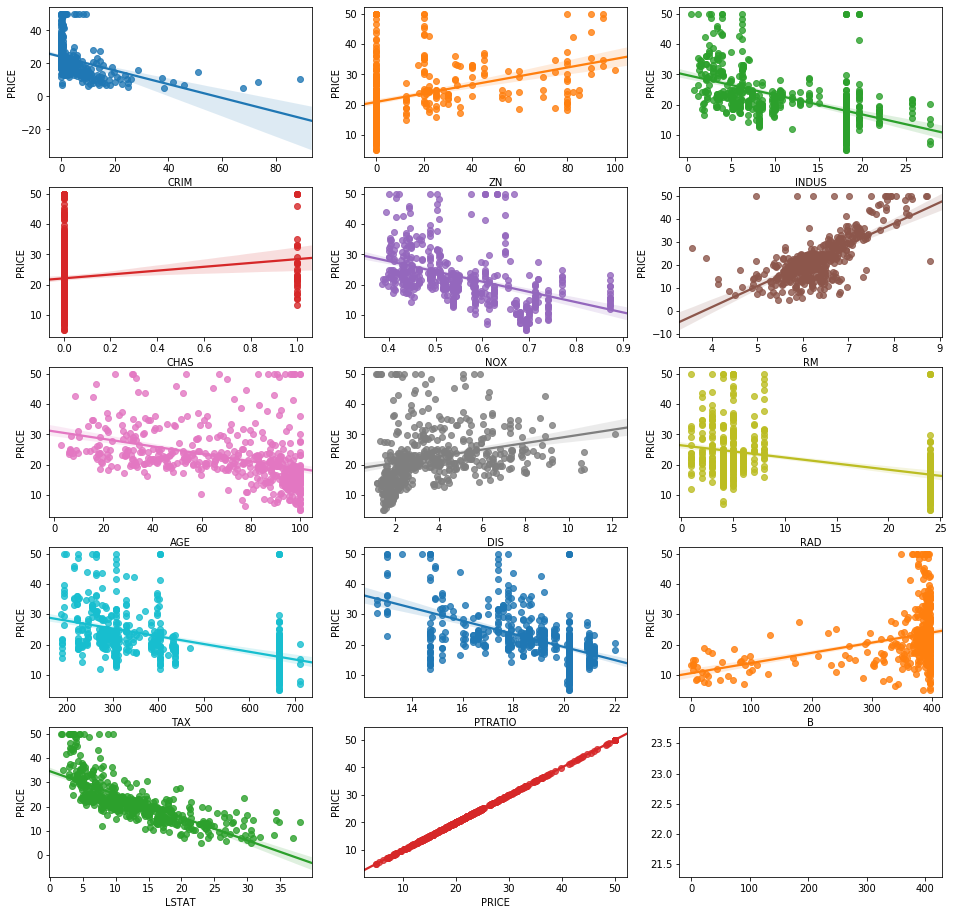

In [9]:
fig,axs=plt.subplots(figsize=(16,16),ncols=3,nrows=5)
for i,(feature,ax) in enumerate(zip(bostonDF.columns,axs.ravel())):
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=ax)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop('PRICE',axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse,rmse))
print('Variancescore : {:.3f} r2_score:{:.3f}'.format(r2_score(y_test,y_preds),lr.score(X_test,y_test)))

MSE : 17.297, RMSE : 4.159
Variancescore : 0.757 r2_score:0.757


In [11]:
print(lr.intercept_)
print(np.round(lr.coef_,1))

40.995595172164336
[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [13]:
from sklearn.preprocessing import PolynomialFeatures
X=np.arange(4).reshape(2,2)
print(X)

poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]



Degree 1 회귀 계수는 [-1.61]

Degree 1 MSE는 0.40772896250986834

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]

Degree 4 MSE는 0.04320874987231747

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]

Degree 15 MSE는 182815433.47648773


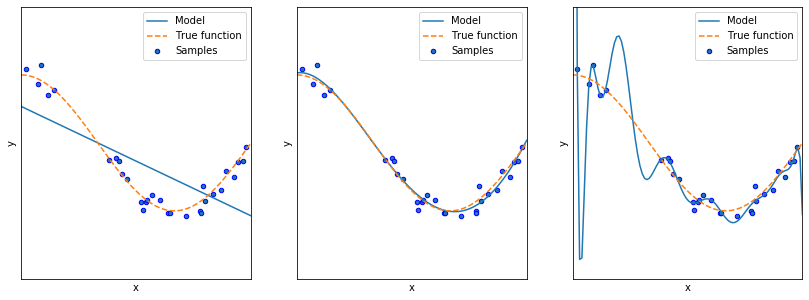

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5*np.pi*X)
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+np.random.randn(n_samples)*0.1

plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynomial_features',polynomial_features),
                      ('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring="neg_mean_squared_error",cv=10)
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {} 회귀 계수는 {}'.format(degrees[i],np.round(coefficients,2)))
    print('\nDegree {} MSE는 {}'.format(degrees[i],-1*np.mean(scores)))
    
    X_test=np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Model")
    plt.plot(X_test,true_fun(X_test),'--',label='True function')
    plt.scatter(X,y,edgecolor='b',s=20,label='Samples')
    plt.xlabel('x');plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
plt.show()
    
          
          

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_score=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_score)
avg_rmse

5.518166280868971

In [22]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
    rmse_score=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_score)
    print("{}:{:.4f}".format(alpha,avg_rmse))

0:5.8287
0.1:5.7885
1:5.6526
10:5.5182
100:5.3296


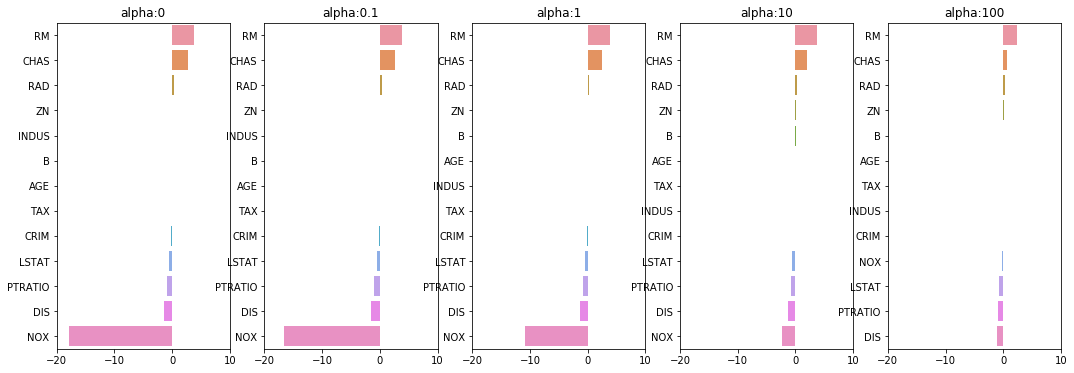

In [32]:
fig,axes=plt.subplots(1,5,figsize=(18,6))
coeff_df=pd.DataFrame()
for pos,alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    coeff=coeff.sort_values(ascending=False)
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-20,10)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axes[pos])
plt.show()

In [30]:
coeff_df.sort_values(by='alpha:0',)[::-1]

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847

In [34]:
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
        coeff_df=pd.DataFrame()
        if verbose:
            print('#######',model_name,'#######')
        for param in params:
            if model_name == 'Ridge': model=Ridge(alpha=param)
            elif model_name == 'Lasso': model=Lasso(alpha=param)
            elif model_name == 'ElasticNet': model=ElasticNet(alpha=param,l1_ratio=0.7)
            neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring="neg_mean_squared_error",
                                          cv=5)
            avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
            print('alpha {} : 5 fold set avg RMSE : {:.4f}'.format(param,avg_rmse))
            model.fit(X_data,y_target)
            coeff=pd.Series(data=model.coef_,index=X_data.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
        return coeff_df


In [36]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',lasso_alphas,X_data,y_target)

####### Lasso #######
alpha 0.07 : 5 fold set avg RMSE : 5.6123
alpha 0.1 : 5 fold set avg RMSE : 5.6151
alpha 0.5 : 5 fold set avg RMSE : 5.6691
alpha 1 : 5 fold set avg RMSE : 5.7760
alpha 3 : 5 fold set avg RMSE : 6.1888


In [54]:
coeff_lasso_df.sort_values(by='alpha:0.07')[::-1]

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

In [57]:
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',elastic_alphas,X_data,y_target)

####### ElasticNet #######
alpha 0.07 : 5 fold set avg RMSE : 5.5417
alpha 0.1 : 5 fold set avg RMSE : 5.5259
alpha 0.5 : 5 fold set avg RMSE : 5.4667
alpha 1 : 5 fold set avg RMSE : 5.5969
alpha 3 : 5 fold set avg RMSE : 6.0681


In [59]:
coeff_elastic_df.sort_values(by='alpha:0.07')[::-1]

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.574162   3.414154   1.918419  0.938789  0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
B          0.010122   0.010067   0.009114  0.008320  0.007020
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.574822  -0.587702  -0.693861 -0.760457 -0.800368
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208

In [82]:
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method == 'Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data
    if p_degree != None:
        scaled_data=PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [85]:
alphas=[0.1,1,10,100]
scaled_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scaled_method in scaled_methods:
    X_data_scaled=get_scaled_data(scaled_method[0],scaled_method[1],X_data)
    print('\n## Preprocessing : {}, Polynomial Degree : {}'.format(scaled_method[0],scaled_method[1]))
    get_linear_reg_eval('Ridge',alphas,X_data_scaled,y_target,verbose=False)


## Preprocessing : None, Polynomial Degree : None
alpha 0.1 : 5 fold set avg RMSE : 5.7885
alpha 1 : 5 fold set avg RMSE : 5.6526
alpha 10 : 5 fold set avg RMSE : 5.5182
alpha 100 : 5 fold set avg RMSE : 5.3296

## Preprocessing : Standard, Polynomial Degree : None
alpha 0.1 : 5 fold set avg RMSE : 5.8260
alpha 1 : 5 fold set avg RMSE : 5.8029
alpha 10 : 5 fold set avg RMSE : 5.6368
alpha 100 : 5 fold set avg RMSE : 5.4214

## Preprocessing : Standard, Polynomial Degree : 2
alpha 0.1 : 5 fold set avg RMSE : 8.8272
alpha 1 : 5 fold set avg RMSE : 6.8713
alpha 10 : 5 fold set avg RMSE : 5.4849
alpha 100 : 5 fold set avg RMSE : 4.6344

## Preprocessing : MinMax, Polynomial Degree : None
alpha 0.1 : 5 fold set avg RMSE : 5.7636
alpha 1 : 5 fold set avg RMSE : 5.4650
alpha 10 : 5 fold set avg RMSE : 5.7542
alpha 100 : 5 fold set avg RMSE : 7.6349

## Preprocessing : MinMax, Polynomial Degree : 2
alpha 0.1 : 5 fold set avg RMSE : 5.2976
alpha 1 : 5 fold set avg RMSE : 4.3227
alpha 10 : 5 fo

In [84]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer=load_breast_cancer()

In [88]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)